<a href="https://colab.research.google.com/github/himuethic/Spam-classifier-/blob/main/Spam_classifier_ok_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/spam_ham_dataset.csv')

In [ ]:
df['text'].value_counts()

,count
text,
"Subject: calpine daily gas nomination\r\n>\r\nricky a . archer\r\nfuel supply\r\n700 louisiana , suite 2700\r\nhouston , texas 77002\r\n713 - 830 - 8659 direct\r\n713 - 830 - 8722 fax\r\n- calpine daily gas nomination 1 . doc",20
Subject: \r\n,16
"Subject: \r\nthis week only : f . ree gen . erlc vlag . ra\r\ncover the shipping , and we ' ll send youour product at no cost to prove its\r\neffectiveness .\r\nwon ' t last . . . hurry\r\nstop promos .\r\n",3
Subject: we ' ve found a school for you !\r\n,3
Subject: you can be smart !\r\n,3
...,...
"Subject: re : driscoll ranch # 3 gas pricing and interconnect estimate\r\ncan you help me out on this darren ? mjj\r\n- - - - - - - - - - - - - - - - - - - - - - forwarded by mary jo johnson / hou / ect on 11 / 09 / 2000\r\n10 : 04 am - - - - - - - - - - - - - - - - - - - - - - - - - - -\r\n"" john daugherty "" on 11 / 08 / 2000 04 : 38 : 37 pm\r\nto :\r\ncc :\r\nsubject : re : driscoll ranch # 3 gas pricing and interconnect estimate\r\nmary jo ,\r\nthanks for the update . regarding the notice provision of 6 business days\r\nprior to the close of business on the last business day of the month prior\r\nto selected month , does that mean we need to give you notice for december\r\nby tuesday , november 21 st at 5 : 00 pm or monday , november 20 th at 5 : 00 pm\r\nassuming the 23 rd and 24 th are holidays ?\r\njohn daugherty\r\n- - - - - original message - - - - -\r\nfrom :\r\nto :\r\ncc : ; ;\r\n; ;\r\n; ;\r\n;\r\nsent : wednesday , november 08 , 2000 5 : 12 pm\r\nsubject : re : driscoll ranch # 3 gas pricing and interconnect estimate",1
"Subject: jordyn , there is nothing like a dream to create the future .\r\nfor the sake of one good action a hundred evil ones should be forgotten\r\nto accomplish more , redirect your mental energy by continuously reminding yourself of all the things you do right\r\n",1
"Subject: from raymond bowen , jr . , exec . v . p . , finance & treasurer\r\nto : all enron employees\r\nfrom : raymond bowen , jr .\r\nevp , finance & treasurer\r\nsubject : update on employee expense reimbursement\r\npost - petition expenses\r\neffective immediately , the processing of expense reimbursement for business expenses incurred by employees after enron corp . ' s chapter 11 filing ( after december 2 nd ) has returned to normal . expenses will be reimbursed promptly upon submission . employees should conduct business travel in the ordinary course of business as approved by direct supervisors . new travel and entertainment guidelines regarding business travel and other employee expenses will be forthcoming . in the meantime , please use discretion as you incur expenses . all expenditures should be made with consideration given to enron ' s current financial situation .\r\npre - petition expenses\r\nwe will immediately begin to reimburse pre - petition expenses for current and former employees ( incurred prior to the december 2 nd chapter 11 filing ) up to a maximum of $ 5 , 000 . we understand that a number of employees have pre - petition expenses in excess of $ 5 , 000 . however , under the first day orders of the bankruptcy court , there is a $ 15 , 000 allowance per employee for unpaid pre - petition compensation , benefits , and related employee expenses . this $ 15 , 000 cap was imposed without input from enron management and counsel . we have sought clarification from the bankruptcy court to assure that this $ 15 , 000 cap does not include the reimbursement of medical , dental , or vision related expenses .\r\nwe have commenced a manual review of every individual with pending pre - petition expenses in excess of $ 5 , 000 . even prior to clarification from the court regarding the medical / dental / vision expense issue , we will begin to reimburse pre - petition expenses in excess of $ 5 , 000 and up to $ 15 , 000 as soon as we can verify that the aggregate reimbursements to an individual employee have not exceeded the $ 15 , 000 cap . unfortunately , since th

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
label,0
text,0
label_num,0


In [ ]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [ ]:
df.drop(columns = ['Unnamed: 0','label'],inplace = True)

In [ ]:
df

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,Subject: industrial worksheets for august 2000...,0


In [ ]:
df['label_num'].value_counts()

,count
label_num,
0,3672
1,1499


In [ ]:
df['characters'] = df['text'].apply(len)

In [ ]:
df

,text,label_num,characters
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,"Subject: photoshop , windows , office . cheap ...",1,414
4,Subject: re : indian springs\r\nthis deal is t...,0,336
...,...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0,534
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,1114
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0,402
5169,Subject: industrial worksheets for august 2000...,0,573


In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df['sentence'] =df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df

,text,label_num,characters,words,sentence
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24
3,"Subject: photoshop , windows , office . cheap ...",1,414,49,3
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3
...,...,...,...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0,534,156,7
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,1114,306,13
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0,402,79,7
5169,Subject: industrial worksheets for august 2000...,0,573,112,20


In [ ]:
 import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df

,text,label_num,characters,words,sentence
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24
3,"Subject: photoshop , windows , office . cheap ...",1,414,49,3
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3
...,...,...,...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0,534,156,7
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,1114,306,13
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0,402,79,7
5169,Subject: industrial worksheets for august 2000...,0,573,112,20


<Axes: xlabel='characters', ylabel='Count'>

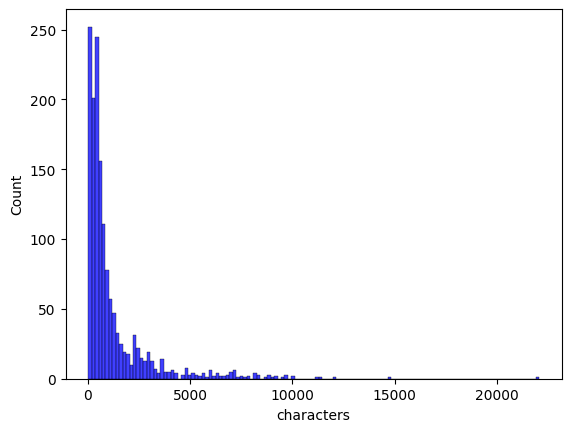

In [ ]:
sns.histplot(df[df['label_num'] == 1]['characters'],color = 'blue')

<Axes: xlabel='characters', ylabel='Count'>

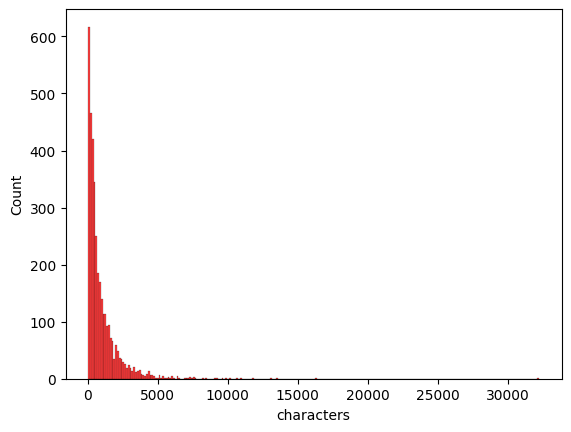

In [ ]:
sns.histplot(df[df['label_num'] == 0]['characters'],color = 'red')

In [ ]:
df[df['label_num'] == 0][['characters','words','sentence']]. describe()

,characters,words,sentence
count,3672.000000,3672.000000,3672.000000
mean,977.008170,226.239107,11.440904
std,1382.827493,332.179661,24.892442
min,18.000000,3.000000,1.000000
25%,231.750000,51.000000,3.000000
50%,530.000000,124.000000,6.000000
75%,1227.250000,294.000000,13.000000
max,32258.000000,8863.000000,1204.000000


In [ ]:
df[df['label_num'] == 1][['characters','words','sentence']]. describe()

,characters,words,sentence
count,1499.000000,1499.000000,1499.000000
mean,1223.256171,236.387592,17.237492
std,1825.986210,346.821249,32.796043
min,11.000000,2.000000,1.000000
25%,283.000000,55.000000,4.000000
50%,576.000000,116.000000,9.000000
75%,1253.500000,244.000000,18.500000
max,22073.000000,3963.000000,693.000000


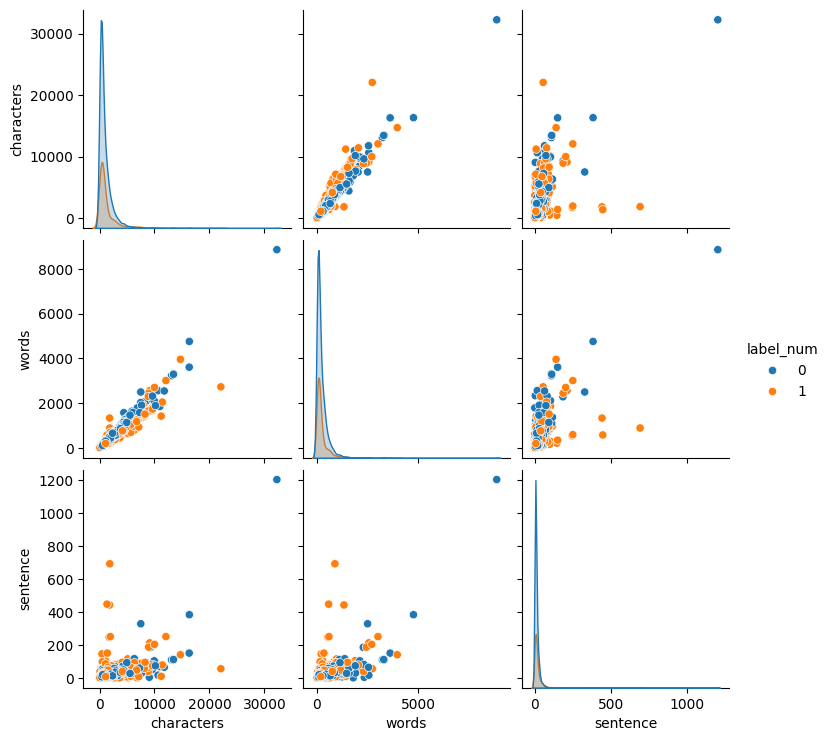

In [ ]:
sns.pairplot(df,hue = 'label_num')

Text preprocessing

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Hating')

'hate'

In [ ]:
def change_text(text) :
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
     if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words("english") and  i not in string.punctuation:
       y.append(i)


  text = y[:]
  y.clear()

  for i in text:
     y.append(ps.stem(i))

  return " ".join(y)

In [ ]:
change_text("thanks god one stop more tk achieving my first")

'thank god one stop tk achiev first'

In [ ]:
change_text('HImu')

'himu'

In [ ]:
df['changed_text'] = df['text'].apply(change_text)

KeyboardInterrupt: 

In [ ]:
df

,text,label_num,characters,words,sentence,changed_text
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,subject enron methanol meter 988291 follow not...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3,subject hpl nom januari 9 2001 see attach file...
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24,subject neon retreat ho ho ho around wonder ti...
3,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,subject photoshop window offic cheap main tren...
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3,subject indian spring deal book teco pvr reven...
...,...,...,...,...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0,534,156,7,subject put 10 ft transport volum decreas 2500...
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,1114,306,13,subject 3 4 2000 follow nom hpl take extra 15 ...
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0,402,79,7,subject calpin daili ga nomin juli mention ear...
5169,Subject: industrial worksheets for august 2000...,0,573,112,20,subject industri worksheet august 2000 activ a...


In [ ]:
from wordcloud import WordCloud

In [ ]:
wc = WordCloud(width= 500,height = 400,min_font_size = 10,background_color = 'black')

In [ ]:
spam_csv = wc.generate(df[df['label_num'] == 1]['changed_text'].str.cat(sep = " "))

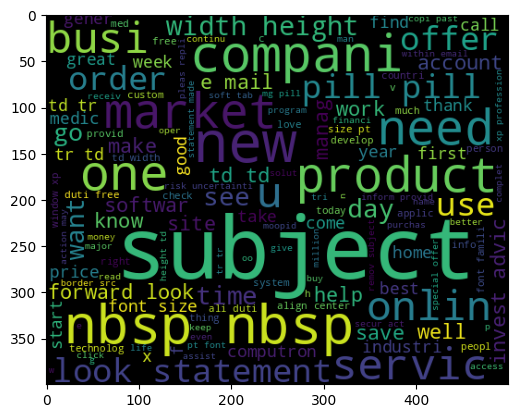

In [ ]:
plt.imshow(spam_csv)

In [ ]:
ham_csv = wc.generate(df[df['label_num'] == 0]['changed_text'].str.cat(sep = " "))

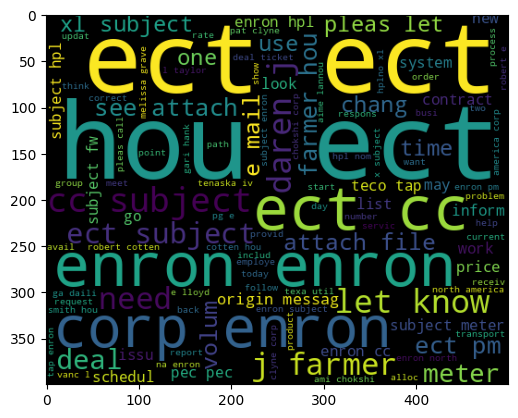

In [ ]:
plt.imshow(ham_csv)

In [ ]:
spam_corpus = []

for msg in df[df['label_num'] == 1]['changed_text'].tolist():
      for word in msg.split():
         spam_corpus.append(word)

In [ ]:
len(spam_corpus)

197452

In [ ]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('subject', 1659),
 ('3', 1239),
 ('com', 992),
 ('http', 984),
 ('compani', 918),
 ('2', 858),
 ('price', 732),
 ('1', 720),
 ('0', 698),
 ('e', 638),
 ('www', 587),
 ('00', 585),
 ('inform', 557),
 ('get', 555),
 ('font', 515),
 ('email', 513),
 ('5', 510),
 ('pleas', 506),
 ('td', 504),
 ('secur', 499),
 ('statement', 497),
 ('4', 494),
 ('invest', 473),
 ('us', 469),
 ('stock', 467),
 ('product', 463),
 ('7', 457),
 ('time', 449),
 ('new', 432),
 ('may', 421)]

In [ ]:
ham_corpus = []

for msg in df[df['label_num'] == 0]['changed_text'].tolist():
      for word in msg.split():
         ham_corpus.append(word)

In [ ]:
from collections import Counter
Counter(ham_corpus).most_common(30)

[('ect', 13897),
 ('hou', 7281),
 ('enron', 6555),
 ('subject', 6405),
 ('2000', 4308),
 ('deal', 3549),
 ('ga', 2895),
 ('pleas', 2737),
 ('meter', 2718),
 ('com', 2717),
 ('cc', 2379),
 ('pm', 2325),
 ('hpl', 2318),
 ('thank', 2125),
 ('2001', 2024),
 ('1', 2023),
 ('daren', 1901),
 ('000', 1880),
 ('00', 1819),
 ('10', 1815),
 ('need', 1730),
 ('01', 1723),
 ('corp', 1710),
 ('3', 1683),
 ('volum', 1668),
 ('forward', 1608),
 ('2', 1521),
 ('know', 1458),
 ('mmbtu', 1408),
 ('e', 1338)]

Model building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer()

In [ ]:
X = cv.fit_transform(df['changed_text']).toarray()

In [ ]:
X

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y = df['label_num']. values
y

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
y

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score, confusion_matrix,precision_score

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9642512077294686
[[734  12]
 [ 25 264]]
0.9565217391304348


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642512077294686
[[734  12]
 [ 25 264]]
0.9565217391304348


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.851207729468599
[[725  21]
 [133 156]]
0.8813559322033898


In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)